Install tensorflow version 2

In [1]:
!pip install tensorflow==2

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 450kB 58.7MB/s 
     |████████████████████████████████| 3.8MB 45.4MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


Import packages

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Data

- The data we will be using is the MNIST Dataset and it will be downloaded from the tensorflow dataset library. 

- The Fashion MNIST dataset contains 70,000 grayscale images group into 10 categories.

- Each image is a 28x28 pixel low resolution image. 

- We will divide the dataset into training and testing dataset.

- 60,000 will be used to train while 10,000 to test.

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 


In [3]:
# Download the data from the keras dataset library
fashion_mnist = keras.datasets.fashion_mnist

# Split the data into train and test and load them into a numpy array
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print('The total number of training images is {}'.format(train_images.shape))
print('The total number of test images is {}'.format(test_images.shape))

The total number of training images is (60000, 28, 28)
The total number of test images is (10000, 28, 28)


Scale the images so they can be on the scale of 0 to 1.

In [0]:
# Scale the images by dividing each images value by 255.0
train_images = train_images / 255.0

test_images = test_images / 255.0

- Reshape images 

In [0]:
# reshape images
train_images_reshaped = train_images.reshape(-1, 28, 28,1)
test_images_reshaped = test_images.reshape(-1,28,28,1)

# Create the Model
- We build the model with 2 conv2d layer, each having, 64 input nodes, 3x3 filter and a relu activation.
- Each convolution layer also passes through a max pooling layer with stride of 2x2.
- The model is then flattened so as to connect to the fully connected dense layer with 128 input nodes and passes through the relu activation function.
- Finally, we have the output layer that outputs 10 nodes,10 for the number of classes and a softmax activation function bacause we are working on a multi-classification problem.


In [7]:
# model structure
model = tf.keras.models.Sequential([
# first conv2d model followed by a maxpooling layer
 tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 # second conv2d model
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 #flatten the output from the second conv2d model
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 # output layer with softmax activation
 tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

- Compile the model with the following parameters
  - adam optimizer: This is most effective optimization function, we have others function that can be used.
  - sparse_categorical_crossentropy loss
  - accuracy metric.

- Run the model on the reshaped train and test data. on 10 iterations

In [8]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images_reshaped, train_labels, epochs=10, 
                  validation_data=(test_images_reshaped, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.4378 - accuracy: 0.8406 - val_loss: 0.3375 - val_accuracy: 0.8756
Epoch 2/10
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.2942 - accuracy: 0.8922 - val_loss: 0.3009 - val_accuracy: 0.8864
Epoch 3/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.2472 - accuracy: 0.9090 - val_loss: 0.2625 - val_accuracy: 0.9017
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.2141 - accuracy: 0.9193 - val_loss: 0.2422 - val_accuracy: 0.9121
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1865 - accuracy: 0.9299 - val_loss: 0.2716 - val_accuracy: 0.9012
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1639 - accuracy: 0.9382 - val_loss: 0.2493 - val_accuracy: 0.9123
Epoch 7/10
60000/60000 [==============================] 

The following codes plots the training accuracy against the validation accuracy.

- We see that 

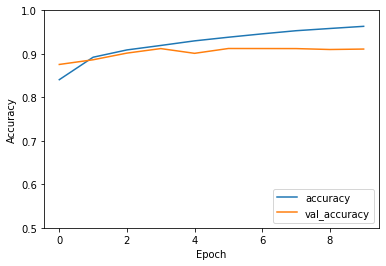

In [9]:
# Plot the model training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Prediction

- Now we can make predictions to see how the model performs.

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images_reshaped)

- Two functions below are used to create a plot of the model prediction on the test data. The prediction comes along with the model probability score and the name of the prediction.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  """
  A function to plot the image and its labels
  """
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

# Blue of the prediction is coreect and red for wrong predictions
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  """
  A function to plot the value array of the predictions along side it probability score
  """
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Plot the predictions
- The code below is going to plot the predictions along side their probability.

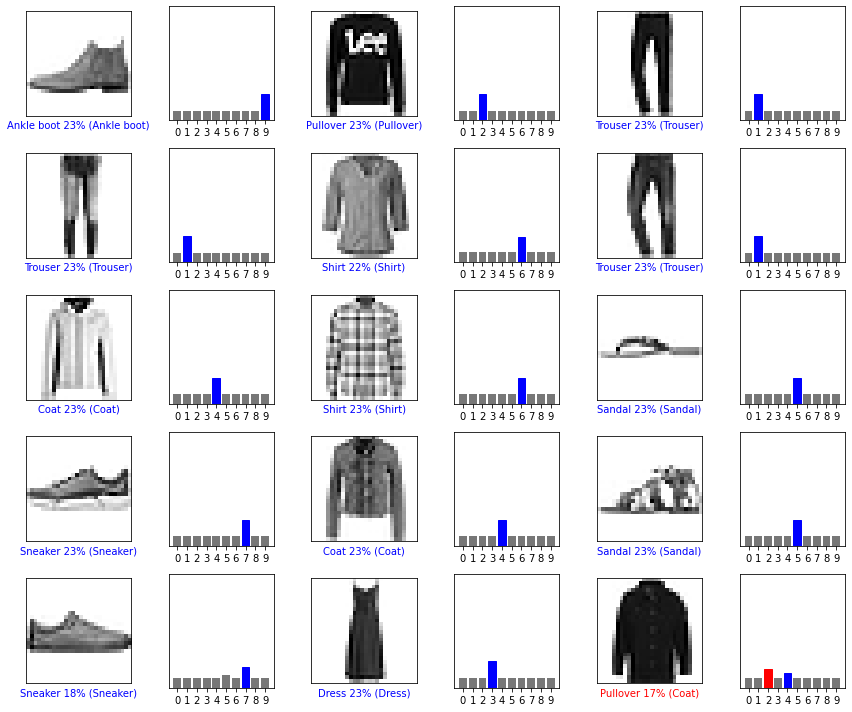

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

- Above we can see that out of the 15 predictions, the model only got one wrong with just a small margin.

# Excercises
- Now is your turn to try out some excercise on your own.

####1. Which of these are the part of the layers that makes up the convoluton neural network architecture.

  A) Convolution layer

  B) Fully Connected Layer

  C) Dynamic layer

  D) Pooling layers

####2. Average pooling and max pooling are types of pooling filters in a convolution neural network

A) True

B) False

###3. Complet the convolution neural network

- Create the creation of the Sequential model


In [0]:
model = tf.______._____._____([
  tf.keras.layers.____(___, (___,___), activation='____', input_shape=(28, 28, 1)),
  tf.keras.layers._____(____, ____),

####4. Add another convolution layer

In [0]:
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)

  _____________ # add another layer
  _____________# add a max pooling layer

####5. Compile and Train the Model
- Complete the code to compile and Train the Model and evaluate the model.

In [0]:
# compile the model
model._______________(_____________, _______________________, ______________________)

#fit the model
____.____(train_images_reshaped, train_labels, _______=10, 
                  validation_data=(test_images_reshaped, test_labels))

# evaluate the model.
test_loss, test_acc = model.__________(test_images_reshaped, test_labels)
print(test_acc)

# Solution


#### Question 1

Solution: A, B and D

#### Question 2

Solution:  True

#### Question 3

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

#### Question 4

In [0]:
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2)

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2)

#### Question 5

In [0]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit the model
model.fit(train_images_reshaped, train_labels, epochs=10, 
                  validation_data=(test_images_reshaped, test_labels))

# get test loss and test accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)